Entrega Final perteneciente a Flavia Alvarez


Se debem realizar los siguientes puntos:

Etapa 1: Recopilación y Preparación de Datos
1. Crear un documento en Google Colaboratory y cargar los sets de datos
como DataFrames.
4. Introducción a Pandas: realizar un análisis exploratorio inicial de los
DataFrames.
5. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de
datos. Documentar el estado inicial de los datos.


Etapa 2: Preprocesamiento y Limpieza de Datos
1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y
caracteres no deseados. Documentar el proceso y los resultados.
2. Transformación de Datos: Aplicar filtros y transformaciones para crear una
tabla de ventas que muestre solo los productos con alto rendimiento
3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.
4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

Etapa 3: Análisis de Datos

1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.
2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.
3. Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.

Etapa 4: Visualización de Datos
1. Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión)
2. Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.
4. Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.

## 1.1 Cargar los sets de datos como DataFrames

In [ ]:
# Entorno
import pandas as pd;
import numpy as np;

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os;
os.listdir("/content/drive/MyDrive/Colab Notebooks/2025 Análisis datos con Python/PreEntrega - Flavia Alvarez/")

['ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'ventas_limpio.csv',
 'marketing_limpio.csv',
 'clientes_limpio.csv',
 'Entrega_Final_Flavia_Alvarez.ipynb']

In [ ]:
#defino una funcion para cargar los csv
def cargar_datos(path):
  return pd.read_csv(path)


In [ ]:
#importo archivos
ventas = cargar_datos("/content/drive/MyDrive/Colab Notebooks/2025 Análisis datos con Python/PreEntrega - Flavia Alvarez/ventas.csv");
clientes = cargar_datos("/content/drive/MyDrive/Colab Notebooks/2025 Análisis datos con Python/PreEntrega - Flavia Alvarez/clientes.csv");
marketing = cargar_datos("/content/drive/MyDrive/Colab Notebooks/2025 Análisis datos con Python/PreEntrega - Flavia Alvarez/marketing.csv");



## 1.1 y 1.2 Analisis exploratorio inicial, ademas de duplicados y nulos

In [ ]:
def analisis_dupl_nulos(df,nombre_a_mostrar, clave):
  print(f"\n \n ****** Analisis de nulos en {nombre_a_mostrar}*********")

  print("\nCantidad de nulos:\n",df.isnull().sum())

  print(f"\n \n ****** Analisis de duplicados en {nombre_a_mostrar} *********")
  print("\nCantidad de duplicados (fila total): ",df.duplicated(keep=False).sum())

  if  (clave in df.columns):
    cant_duplicados = df.duplicated(subset=clave, keep=False).sum()
    print(f"\nCantidad de duplicados en columna {clave}: ",cant_duplicados);

    if (cant_duplicados > 0):
      duplicados_ordenados = (
                  df[df[clave].duplicated(keep=False)][clave]
                  .value_counts()                # Cuenta cuántas veces aparece cada valor
                  .sort_values(ascending=False)   # Ordena de mayor a menor (más duplicados arriba)
              )

      display(duplicados_ordenados.head(10))
  elif (clave):
    print(f"\nNo se encontro columna {clave} en el dataset")

  print("\n\nCantidad de valores unicos por columna")
  print(df.nunique())
  return;

In [ ]:
# Esta funcion es para realizar un analisis del dataset

def analisis_datos(df, nombre_a_mostrar, clave):
  print(f"\n******* Analisis inicial de {nombre_a_mostrar} *******\n")
  print("Tamaño del dataset:", df.shape)
  print("\nInformacion basica de las columnas del dataset:\n")
  print(df.info())
  print("\nPrimeras filas del dataset")
  print(df.head(5))
  print("\n\n ****** Descripcion del dataset: ******\n")
  print(df.describe())
  analisis_dupl_nulos(df, nombre_a_mostrar, clave)


  return;



In [ ]:
analisis_datos(ventas,"Ventas", "id_venta");


******* Analisis inicial de Ventas *******

Tamaño del dataset: (3035, 6)

Informacion basica de las columnas del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB
None

Primeras filas del dataset
   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546

,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2




Cantidad de valores unicos por columna
id_venta       3000
producto         30
precio         2590
cantidad         12
fecha_venta     364
categoria         3
dtype: int64


In [ ]:
analisis_datos(clientes,"Clientes", "id_cliente");


******* Analisis inicial de Clientes *******

Tamaño del dataset: (567, 5)

Informacion basica de las columnas del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
None

Primeras filas del dataset
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  

In [ ]:
analisis_datos(marketing,"Marketing", "id_campanha");


******* Analisis inicial de Marketing *******

Tamaño del dataset: (90, 6)

Informacion basica de las columnas del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB
None

Primeras filas del dataset
   id_campanha         producto  canal  costo fecha_inicio   fecha_fin
0           74  Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12           Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32  Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
3           21       Smartphone   RRSS   6.37   2

## 2.1 Limpieza del dataset

1. Eliminamos duplicados.
2. Normalizamos texto en columnas object (trim + capitalización simple).
3. Convertimos fechas a fechas reales
4. Convertimos precio y cantidad a numéricos si existen.
5. Guardamos CSV limpios.



In [ ]:
#Se crea copia de los dataset para trabajar
ventas_df = ventas.copy();
clientes_df = clientes.copy();
marketing_df = marketing.copy();

In [ ]:
# 1. Eliminar duplicados
ventas_df.drop_duplicates(inplace=True)
clientes_df.drop_duplicates(inplace=True)
marketing_df.drop_duplicates(inplace=True)

In [ ]:
#solo analizamos ventas pues era el unico que tenia duplicados
analisis_dupl_nulos(ventas_df,"Ventas", "id_venta");



 
 ****** Analisis de nulos en Ventas*********

Cantidad de nulos:
 id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

 
 ****** Analisis de duplicados en Ventas *********

Cantidad de duplicados (fila total):  0

Cantidad de duplicados en columna id_venta:  0


Cantidad de valores unicos por columna
id_venta       3000
producto         30
precio         2590
cantidad         12
fecha_venta     364
categoria         3
dtype: int64


In [ ]:
# 2.Normalizamos texto en columnas object (trim + capitalización simple).

def formatear_texto(df):
  columnas = df.select_dtypes(include=['object']).columns
  print(columnas)
  ptron_caracteres_raros = r"[\u200b\t\r\n]"
  ptron_nblancos = r" +"
  df[columnas] = df[columnas].apply(lambda x: x.astype(str)
      .str.strip()
      .str.title()
      .str.replace(ptron_caracteres_raros,'',regex =True)
      .str.replace(ptron_nblancos,' ',regex =True))
  return df;



In [ ]:
formatear_texto(ventas_df);
formatear_texto(clientes_df);
formatear_texto(marketing_df);


Index(['producto', 'precio', 'fecha_venta', 'categoria'], dtype='object')
Index(['nombre', 'ciudad'], dtype='object')
Index(['producto', 'canal', 'fecha_inicio', 'fecha_fin'], dtype='object')


In [ ]:
# 3. Formateo de fechas

#filtrar columnas que se llamen fecha
def formatear_fechas(df):
    columnas = df.columns.tolist()
    columnas_fechas = [col for col in columnas if 'fecha' in col.lower()]
    df[columnas_fechas] = df[columnas_fechas].apply(pd.to_datetime, errors='coerce', dayfirst=True)
    return

In [ ]:
formatear_fechas(ventas_df);
formatear_fechas(clientes_df);
formatear_fechas(marketing_df);


In [ ]:
# formatear precios o costo
def formatear_precios(df):
  columnas = df.columns.tolist()
  print("Columnas: ",columnas)
  columnas_numericas = [col for col in columnas if 'precio' in col.lower() or 'costo' in col.lower() or 'ingresos' in col.lower()]
  print("Columnas a modificar: ",columnas_numericas)
  df[columnas_numericas] = df[columnas_numericas].apply(lambda x: x.astype(str)
                            .str.replace('$','')
                            .str.replace(',','')
                            .str.strip()
                            )

  #print(df[columnas_numericas].head(10))
  df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')
  return ;

In [ ]:
formatear_precios(ventas_df);
formatear_precios(clientes_df);
formatear_precios(marketing_df);

Columnas:  ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
Columnas a modificar:  ['precio']
Columnas:  ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
Columnas a modificar:  ['ingresos']
Columnas:  ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
Columnas a modificar:  ['costo']


In [ ]:
# formateo campos cantidades
def formatear_enteros(df):
  columnas = df.columns.tolist()
  print("Columnas: ",columnas)
  columnas_numericas = [col for col in columnas if 'cantidad' in col.lower()]
  print("Columnas a modificar: ",columnas_numericas)
  df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce').astype("Int64")
  return;


In [ ]:
formatear_enteros (ventas_df);
formatear_enteros (clientes_df);
formatear_enteros (marketing_df);

Columnas:  ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
Columnas a modificar:  ['cantidad']
Columnas:  ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
Columnas a modificar:  []
Columnas:  ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
Columnas a modificar:  []


In [ ]:
analisis_datos(ventas_df,"Ventas", "id_venta");



******* Analisis inicial de Ventas *******

Tamaño del dataset: (3000, 6)

Informacion basica de las columnas del dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
None

Primeras filas del dataset
   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94         5  2024-01-02   
1       811    Lámpara De Mesa  105.10         5  2024-01-02   
2      1156           Secadora   97.96         3  2024-01-02   


In [ ]:
analisis_datos(clientes_df,"Clientes", "id_cliente");



******* Analisis inicial de Clientes *******

Tamaño del dataset: (567, 5)

Informacion basica de las columnas del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
None

Primeras filas del dataset
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar Del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  

In [ ]:
analisis_datos(marketing_df,"Marketing", "id_campanha");


******* Analisis inicial de Marketing *******

Tamaño del dataset: (90, 6)

Informacion basica de las columnas del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB
None

Primeras filas del dataset
   id_campanha         producto  canal  costo fecha_inicio  fecha_fin
0           74  Adorno De Pared     Tv   4.81   2024-03-20 2024-05-03
1           12           Tablet   Rrss   3.40   2024-03-26 2024-05-13
2           32  Lámpara De Mesa  Email   5.54   

In [ ]:
#grabar a csv
ventas_df.to_csv("/content/drive/MyDrive/Colab Notebooks/2025 Análisis datos con Python/PreEntrega - Flavia Alvarez/ventas_limpio.csv", index=False)
clientes_df.to_csv("/content/drive/MyDrive/Colab Notebooks/2025 Análisis datos con Python/PreEntrega - Flavia Alvarez/clientes_limpio.csv", index=False)
marketing_df.to_csv("/content/drive/MyDrive/Colab Notebooks/2025 Análisis datos con Python/PreEntrega - Flavia Alvarez/marketing_limpio.csv", index=False)

os.listdir("/content/drive/MyDrive/Colab Notebooks/2025 Análisis datos con Python/PreEntrega - Flavia Alvarez/")

['ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'ventas_limpio.csv',
 'marketing_limpio.csv',
 'clientes_limpio.csv',
 'Entrega_Final_Flavia_Alvarez.ipynb']

 ## 2.2 Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento

In [ ]:
#Creo una tabla de ventas con los de mayor rendimiento
ventas_calc = ventas_df.assign(total_venta = ventas_df['cantidad']*ventas_df['precio'] )


ventas_totales_x_prod = (ventas_calc
                  .groupby( by = 'producto',
                                     dropna= False,
                                      as_index= False
                                      )
                  .agg(imp_total_ventas = ("total_venta",'sum'),
                       cant_unidades_vendidas = ("cantidad", 'sum'),
                       cant_de_ventas = ("cantidad", 'count'),
                       precio_medio = ("precio", 'mean'),
                       mejor_venta = ("total_venta", 'max'),
                       peor_venta = ("total_venta", 'min'),
                       venta_promedio = ("total_venta", 'mean')

                       )

)

print(ventas_totales_x_prod.head(10))



                 producto  imp_total_ventas  cant_unidades_vendidas  \
0         Adorno De Pared          48093.49                     633   
1                Alfombra          44773.06                     615   
2              Aspiradora          50085.86                     651   
3             Auriculares          74175.58                     958   
4                Batidora           50979.2                     672   
5                Cafetera          59607.31                     765   
6              Candelabro           11128.8                     160   
7  Consola De Videojuegos          46174.41                     623   
8                Cortinas          44865.03                     610   
9       Cuadro Decorativo           54297.6                     726   

   cant_de_ventas  precio_medio  mejor_venta  peor_venta  venta_promedio  
0             100     76.097800      1302.18       33.01        480.9349  
1             100     74.098300      1381.44        34.7        447.

In [ ]:
#Calcular el percentile 80%
ventas_percentile = ventas_totales_x_prod['imp_total_ventas'].quantile(q=0.8, interpolation = "linear").round(2)
print(ventas_percentile)

52518.85


In [ ]:
#filtrar los que superan el percentile
ventas_filtradas = ventas_totales_x_prod[ventas_totales_x_prod['imp_total_ventas'] > ventas_percentile]
print(f"Los ventas con monto de venta mayor a {ventas_percentile} son: \n")
display(ventas_filtradas.sort_values(by='imp_total_ventas', ascending=False))



Los ventas con monto de venta mayor a 52518.85 son: 



,producto,imp_total_ventas,cant_unidades_vendidas,cant_de_ventas,precio_medio,mejor_venta,peor_venta,venta_promedio
19,Lámpara De Mesa,82276.38,1112,176,72.720625,1325.4,31.24,467.479432
3,Auriculares,74175.58,958,143,76.302727,1404.84,32.0,518.71035
20,Microondas,72562.89,912,135,79.176000,1440.24,33.73,537.502889
5,Cafetera,59607.31,765,117,79.046581,1389.6,26.3,509.464188
9,Cuadro Decorativo,54297.6,726,100,74.578000,1428.84,29.17,542.976
26,Smartphone,54132.44,665,101,81.398416,1488.12,34.5,535.964752


## 2.3 Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [ ]:
ventas_x_cat = ventas_calc.copy()

resumenXcat = (ventas_x_cat
               .groupby( by = 'categoria',
                                 dropna= False,
                                 as_index= False)
               .agg(imp_total_ventas = ("total_venta",'sum'),
                    cant_unidades_vendidas = ("cantidad", 'sum'),
                    cant_de_ventas = ("cantidad", 'count'),
                    precio_medio = ("precio", 'mean'),
                    mejor_venta = ("total_venta", 'max'),
                    peor_venta = ("total_venta", 'min'),
                    venta_promedio = ("total_venta", 'mean')

                      )
               .sort_values(by='imp_total_ventas',
                            ascending=False,
                            ignore_index=True)
)

display (resumenXcat)


,categoria,imp_total_ventas,cant_unidades_vendidas,cant_de_ventas,precio_medio,mejor_venta,peor_venta,venta_promedio
0,Electrodomésticos,505299.63,6592,1000,76.52096,1485.96,26.3,505.29963
1,Electrónica,482577.8,6413,998,75.25492,1488.12,27.83,483.54489
2,Decoración,479216.09,6490,1000,74.09800,1449.48,29.17,479.21609


ETAPA 2: 4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [ ]:
ventas_totales_x_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   producto                30 non-null     object 
 1   imp_total_ventas        30 non-null     Float64
 2   cant_unidades_vendidas  30 non-null     Int64  
 3   cant_de_ventas          30 non-null     Int64  
 4   precio_medio            30 non-null     float64
 5   mejor_venta             30 non-null     Float64
 6   peor_venta              30 non-null     Float64
 7   venta_promedio          30 non-null     Float64
dtypes: Float64(4), Int64(2), float64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
# En ventas_totales_x_prod tengo el agrupado por producto


marketing_X_prod = (marketing_df
                    .groupby (
                              by = 'producto',
                              dropna= False,
                              as_index= False
                              )
                    .agg (
                        costo_totalCampania = ("costo","sum")
                    )
                    .sort_values(by='costo_totalCampania',
                                 ascending=False,
                                 ignore_index=True)
)

display (marketing_X_prod)

,producto,costo_totalCampania
0,Cafetera,18.16
1,Alfombra,17.46
2,Cortinas,17.36
3,Elementos De Cerámica,16.87
4,Aspiradora,16.46
5,Rincón De Plantas,16.45
6,Cámara Digital,16.40
7,Lámpara De Mesa,15.93
8,Cuadro Decorativo,15.85
9,Smartphone,15.80


In [ ]:
relacion_marketing_ventas = ventas_totales_x_prod.merge(marketing_X_prod, on='producto')
relacion_marketing_ventas ["porc_costo_sobre_ingreso"]  = (relacion_marketing_ventas["costo_totalCampania"]/relacion_marketing_ventas["imp_total_ventas"])*100
relacion_marketing_ventas ["porc_costo_sobre_cantVendido"]  =(relacion_marketing_ventas["costo_totalCampania"]/relacion_marketing_ventas["cant_unidades_vendidas"])*100
display(relacion_marketing_ventas)

,producto,imp_total_ventas,cant_unidades_vendidas,cant_de_ventas,precio_medio,mejor_venta,peor_venta,venta_promedio,costo_totalCampania,porc_costo_sobre_ingreso,porc_costo_sobre_cantVendido
0,Adorno De Pared,48093.49,633,100,76.097800,1302.18,33.01,480.9349,14.05,0.029214,2.219589
1,Alfombra,44773.06,615,100,74.098300,1381.44,34.7,447.7306,17.46,0.038997,2.839024
2,Aspiradora,50085.86,651,100,77.447400,1356.96,47.53,500.8586,16.46,0.032864,2.528418
3,Auriculares,74175.58,958,143,76.302727,1404.84,32.0,518.71035,15.24,0.020546,1.590814
4,Batidora,50979.2,672,100,77.537200,1485.96,55.47,509.792,15.28,0.029973,2.27381
5,Cafetera,59607.31,765,117,79.046581,1389.6,26.3,509.464188,18.16,0.030466,2.373856
6,Candelabro,11128.8,160,24,74.595417,1088.4,52.41,463.7,14.65,0.13164,9.15625
7,Consola De Videojuegos,46174.41,623,99,76.346869,1327.2,31.09,466.408182,12.77,0.027656,2.049759
8,Cortinas,44865.03,610,100,73.649900,1380.24,46.09,448.6503,17.36,0.038694,2.845902
9,Cuadro Decorativo,54297.6,726,100,74.578000,1428.84,29.17,542.976,15.85,0.029191,2.183196


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

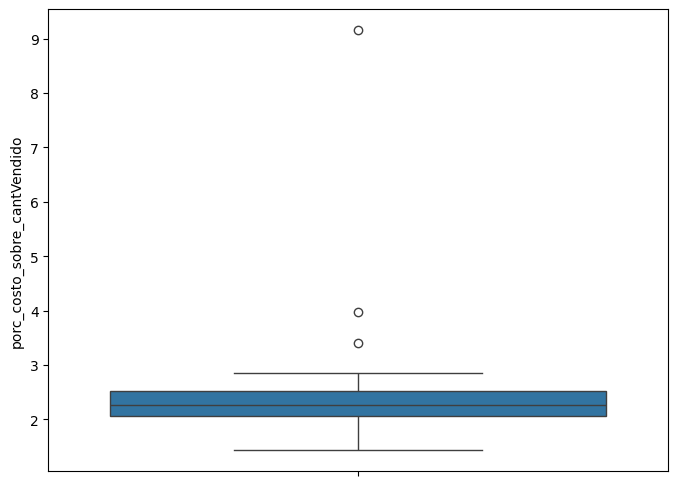

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot( y=relacion_marketing_ventas['porc_costo_sobre_cantVendido'])

plt

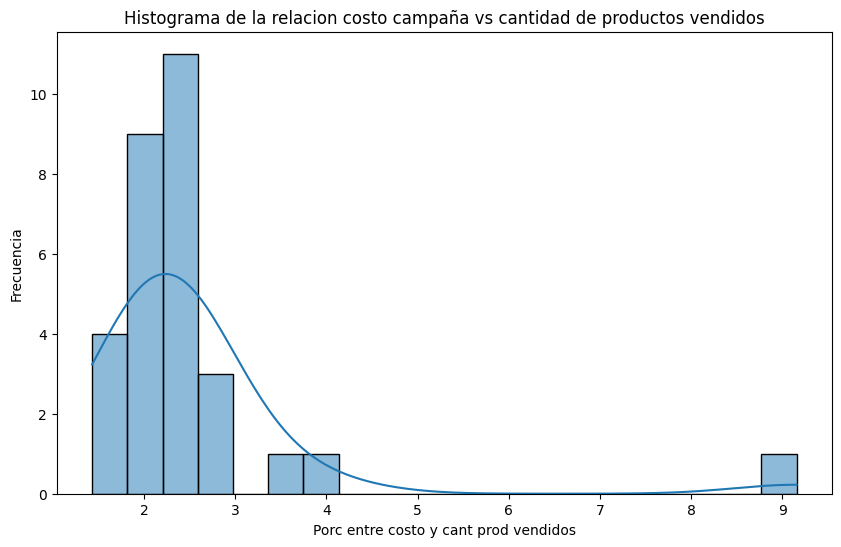

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=relacion_marketing_ventas, x='porc_costo_sobre_cantVendido', bins=20, kde=True)
plt.title('Histograma de la relacion costo campaña vs cantidad de productos vendidos')
plt.xlabel('Porc entre costo y cant prod vendidos')
plt.ylabel('Frecuencia')
plt.show()


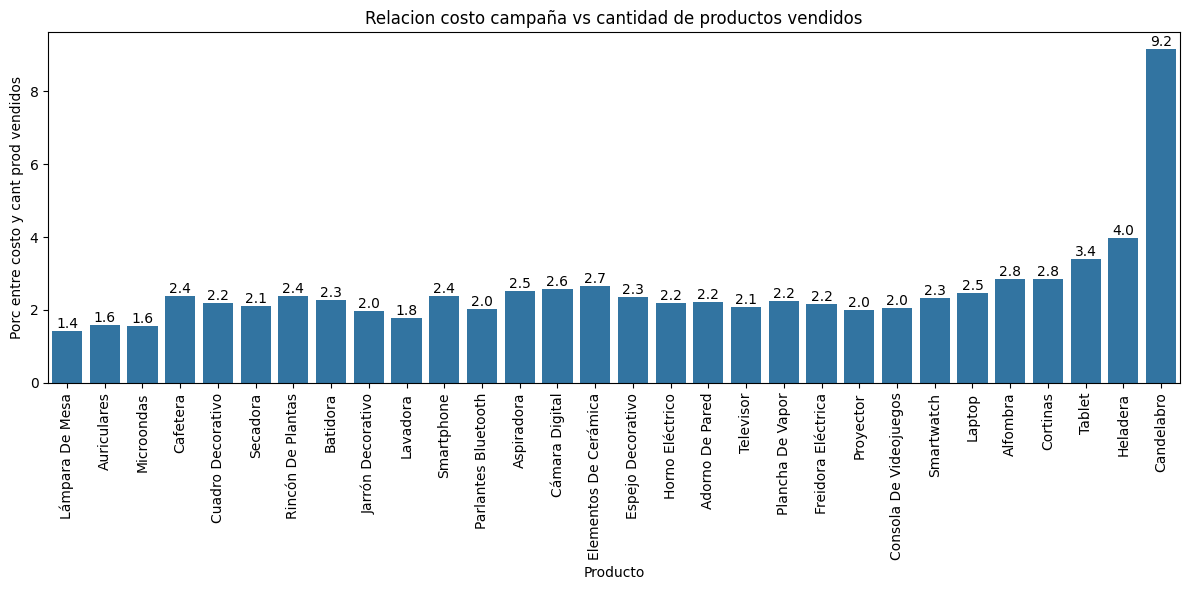

In [ ]:
#grafico que muestra la relacion entre el costo de la campaña y la cantidad de ventas realizadas
plt.figure(figsize=(12, 6))
sns.barplot(x='producto',
            y='porc_costo_sobre_cantVendido',
            data=relacion_marketing_ventas,order=relacion_marketing_ventas.sort_values('cant_unidades_vendidas', ascending=False).producto)
plt.xticks(rotation=90)
plt.title('Relacion costo campaña vs cantidad de productos vendidos')
plt.ylabel('Porc entre costo y cant prod vendidos')
plt.xlabel('Producto')
plt.bar_label(plt.gca().containers[0], fmt='%.1f')
plt.tight_layout()
plt.show()


# Etapa 3: Análisis de Datos

## 3.1 Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.

Media: promedio

Mediana: valor central de los datos

Moda: valor que mas se repite

In [ ]:
df_vxp = ventas_totales_x_prod.copy()

df_vxp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   producto                30 non-null     object 
 1   imp_total_ventas        30 non-null     Float64
 2   cant_unidades_vendidas  30 non-null     Int64  
 3   cant_de_ventas          30 non-null     Int64  
 4   precio_medio            30 non-null     float64
 5   mejor_venta             30 non-null     Float64
 6   peor_venta              30 non-null     Float64
 7   venta_promedio          30 non-null     Float64
dtypes: Float64(4), Int64(2), float64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
media = df_vxp['imp_total_ventas'].mean()
mediana = df_vxp['imp_total_ventas'].median()
moda = df_vxp['imp_total_ventas'].mode()
maximo = df_vxp['imp_total_ventas'].max()
minimo = df_vxp['imp_total_ventas'].min()
rango = maximo - minimo
desviacion = df_vxp['imp_total_ventas'].std(ddof=1)
varianza = df_vxp['imp_total_ventas'].var(ddof=1)

print(f"Media: {media:,.2f}")
print(f"Mediana: {mediana:,.2f}")
print(f"Maximo: {maximo:,.2f}")
print(f"Minimo: {minimo:,.2f}")
print(f"Rango: {rango:,.2f}")
print(f"Desviacion: {desviacion:,.2f}")
print(f"Varianza: {varianza:,.2f}")
print(f"Moda: ")
print(moda)

Media: 48,903.12
Mediana: 48,140.24
Maximo: 82,276.38
Minimo: 11,128.80
Rango: 71,147.58
Desviacion: 13,265.56
Varianza: 175,975,127.63
Moda: 
0      11128.8
1      25736.8
2     25856.57
3     44773.06
4     44865.03
5     45196.63
6     45217.96
7     45411.09
8     46174.41
9     46179.48
10    46783.31
11    47038.04
12    47779.46
13    47836.86
14    48093.49
15     48187.0
16    48946.44
17     49913.9
18    50085.86
19    50155.15
20    50456.45
21     50979.2
22    51130.88
23    52115.45
24    54132.44
25     54297.6
26    59607.31
27    72562.89
28    74175.58
29    82276.38
Name: imp_total_ventas, dtype: Float64


# Analisis de ventas por producto


## Media vs Mediana:
El promedio (media) es $48,903.12 y la mediana $48,140.24 tienen valores muy similares. Los valores extremos no afectan al promedio significativamente.


## Rango:
El rango es 71,147.58, es la diferencia entre la venta maxima $82,276.38 y la venta minima $11,128.80.

## Desviacion estandard:
La desviacion estandard es 13,265.56, es la dispersion promedio de las ventas totales de cada producto respecto a la media.


## Varianza:

La varianza es 175,975,127.63, es el promedio de las desviaciones al cuadrado.





## 3.2 Análisis Exploratorio de Datos (EDA)

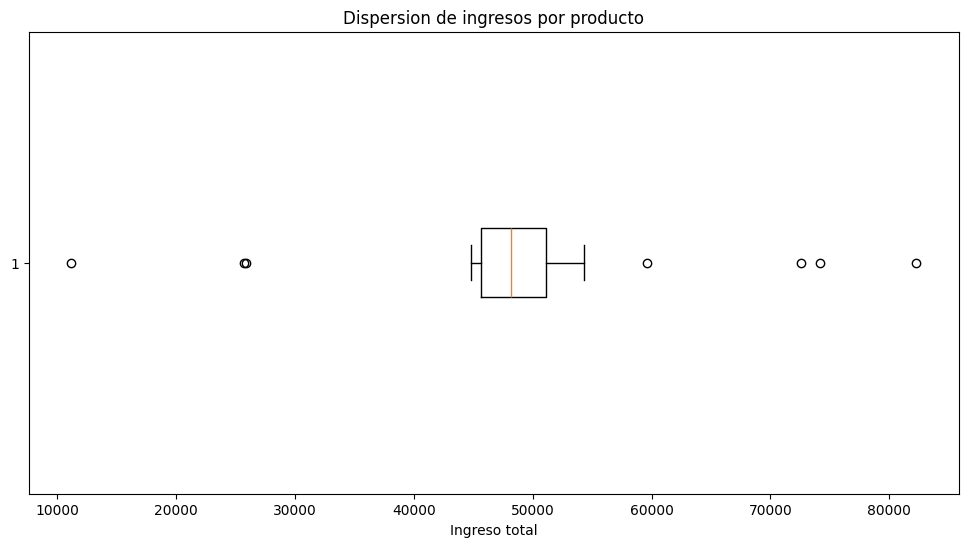

In [ ]:
import matplotlib.pyplot as plt

datos = df_vxp['imp_total_ventas'].dropna()
plt.figure(figsize=(12, 6))
plt.boxplot(datos, vert=False)
plt.title('Dispersion de ingresos por producto')
plt.xlabel('Ingreso total')
plt.show()

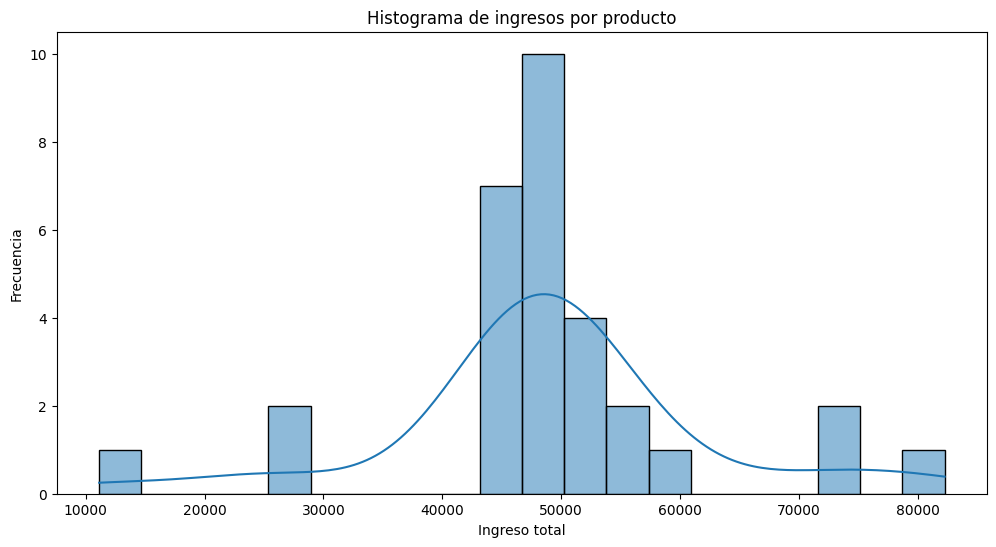

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_vxp, x='imp_total_ventas', bins=20, kde=True)
plt.title('Histograma de ingresos por producto')
plt.xlabel('Ingreso total')
plt.ylabel('Frecuencia')
plt.show()


## 3.3 Correlacion entre precio y cant de unidades vendidas.

Relacion entre la cantidad de unidades vendidas y el precio promedio.


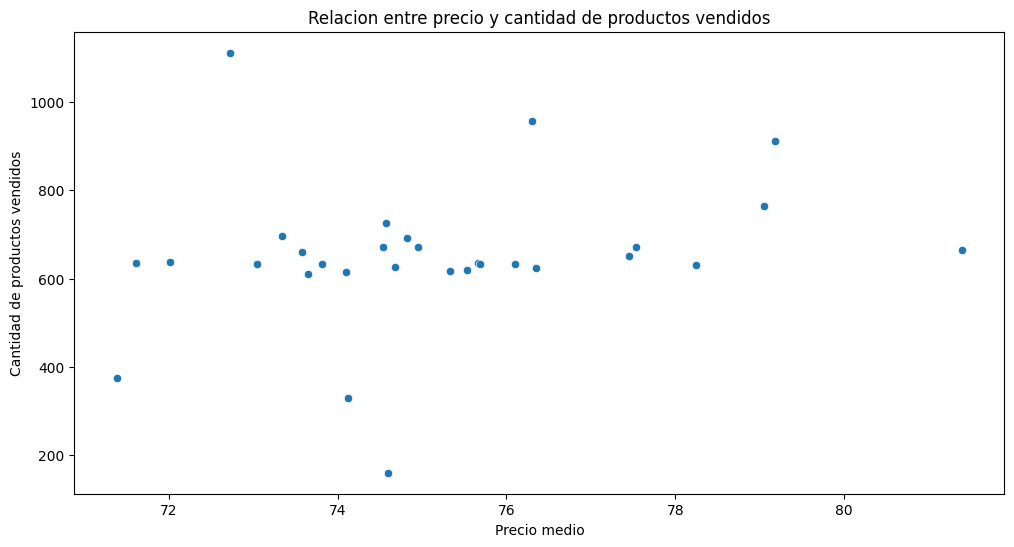

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='precio_medio', y='cant_unidades_vendidas', data=df_vxp)


plt.title('Relacion entre precio y cantidad de productos vendidos')
plt.xlabel('Precio medio')
plt.ylabel('Cantidad de productos vendidos')
plt.show()

In [ ]:
correlacion = df_vxp[['precio_medio', 'cant_unidades_vendidas']].corr().loc['precio_medio', 'cant_unidades_vendidas']
print(f'Coeficiente de correlacion:  {correlacion:.3f}' )

if correlacion > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif correlacion > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif correlacion < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif correlacion < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")




Coeficiente de correlacion:  0.217
Interpretación: relación positiva débil a moderada.


#Etapa 4: Visualización de Datos

## 4.1 Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión)

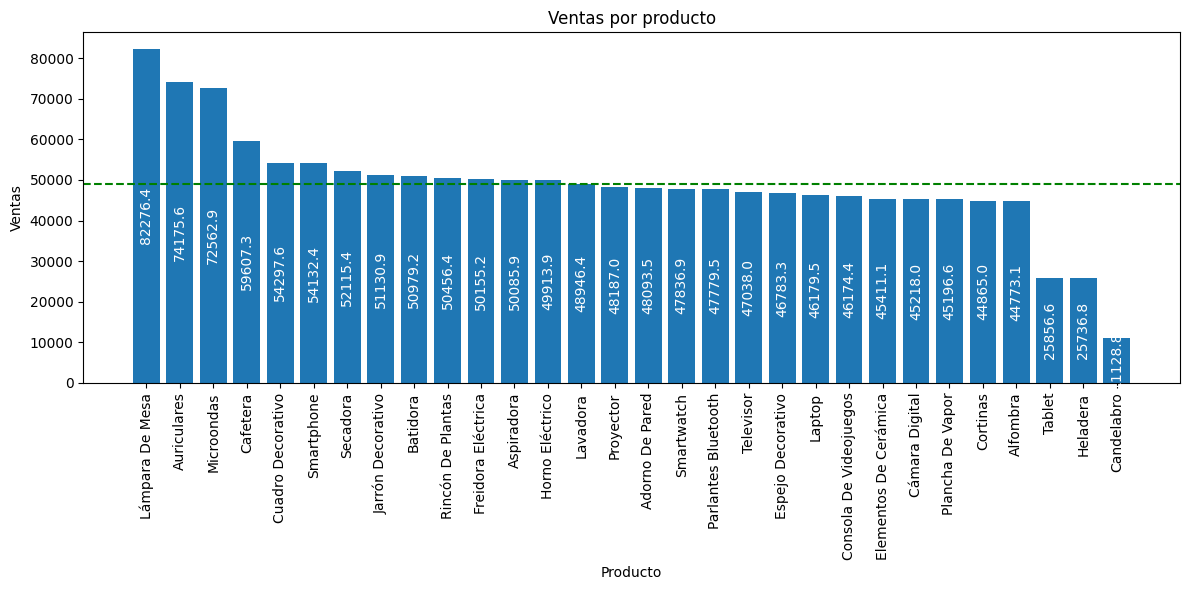

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data = df_vxp.sort_values('imp_total_ventas',ascending=False)

barras = plt.bar (data['producto'], data['imp_total_ventas'])
plt.xticks(rotation=90)
plt.axhline(media, color='g', linestyle='--', label='Media')
plt.title('Ventas por producto')
plt.ylabel('Ventas')
plt.xlabel('Producto')
plt.bar_label(plt.gca().containers[0], fmt='%.1f', rotation = 90, color='white', label_type= 'center')
plt.tight_layout()
plt.show()

In [ ]:
ventas_calc['fecha_venta'] = pd.to_datetime(ventas_calc['fecha_venta'])

ventas_x_dia = (ventas_calc
      .groupby(by = 'fecha_venta',
                                 dropna= False,
                                 as_index= False)
      .agg(imp_total_ventas = ("total_venta",'sum'),
           cant_unidades_vendidas = ("cantidad", 'sum'),
           cant_de_ventas = ("cantidad", 'count'),
           precio_medio = ("precio", 'mean'),
           mejor_venta = ("total_venta", 'max'),
           peor_venta = ("total_venta", 'min'),
           venta_promedio = ("total_venta", 'mean')
      )
       .sort_index()
       .reset_index()
)

ventas_x_dia['imp_total_ventas_acum'] = ventas_x_dia['imp_total_ventas'].cumsum()

display(ventas_x_dia)

,index,fecha_venta,imp_total_ventas,cant_unidades_vendidas,cant_de_ventas,precio_medio,mejor_venta,peor_venta,venta_promedio,imp_total_ventas_acum
0,0,2024-01-02,3751.26,45,8,85.313750,914.8,130.86,468.9075,3751.26
1,1,2024-01-03,3601.84,52,8,76.205000,878.46,111.18,450.23,7353.1
2,2,2024-01-04,5241.78,63,8,75.811250,1344.75,32.15,655.2225,12594.88
3,3,2024-01-05,4758.53,52,6,92.128333,1204.39,323.34,793.088333,17353.41
4,4,2024-01-06,2899.6,38,6,73.528333,923.13,152.28,483.266667,20253.01
...,...,...,...,...,...,...,...,...,...,...
359,359,2024-12-26,2848.58,52,9,49.003333,761.76,29.76,316.508889,1451156.47
360,360,2024-12-27,2664.26,42,6,69.736667,827.92,89.05,444.043333,1453820.73
361,361,2024-12-28,3185.85,34,5,89.392000,1117.35,94.28,637.17,1457006.58
362,362,2024-12-29,4220.71,64,10,75.001000,936.32,199.36,422.071,1461227.29


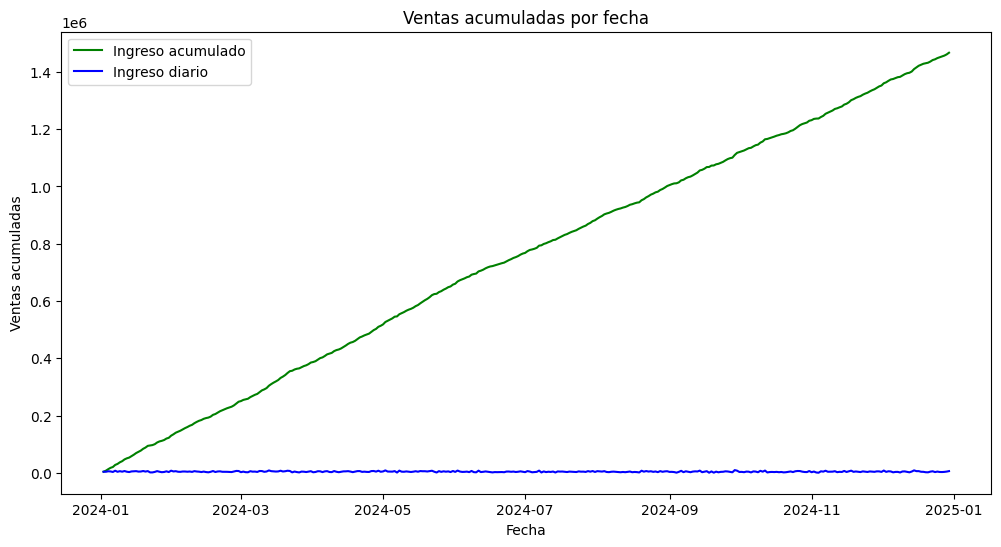

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ventas_x_dia['fecha_venta'], ventas_x_dia['imp_total_ventas_acum'], label = "Ingreso acumulado", color = "green")
plt.plot(ventas_x_dia['fecha_venta'], ventas_x_dia['imp_total_ventas'], label = "Ingreso diario", color = "blue")
plt.legend()
plt.title('Ventas acumuladas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Ventas acumuladas')
plt.show()

##4.2 Visualización Avanzada con Seaborn

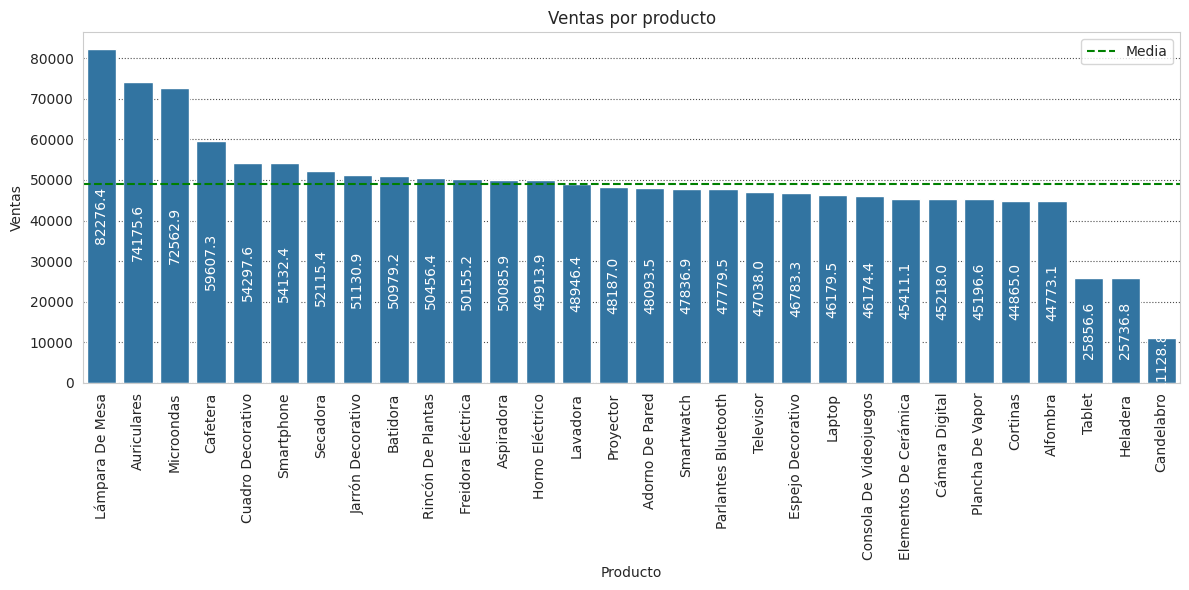

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid", {"grid.color": ".3", "grid.linestyle": ":" })
sns.barplot(x='producto',
            y='imp_total_ventas',
            data=df_vxp,order=df_vxp.sort_values('imp_total_ventas', ascending=False).producto)
plt.xticks(rotation=90)
plt.axhline(media, color='g', linestyle='--', label='Media')
plt.title('Ventas por producto')
plt.ylabel('Ventas')
plt.xlabel('Producto')
plt.legend()
plt.bar_label(plt.gca().containers[0], fmt='%.1f', rotation = 90, color='white', label_type= 'center')
plt.tight_layout()
plt.show()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,total_venta,DiaDeSemana
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7,Tuesday
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5,Tuesday
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,Tuesday
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.8,Tuesday
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,Tuesday
...,...,...,...,...,...,...,...,...
3030,1837,Horno Eléctrico,104.12,9,2024-12-30,Electrodomésticos,937.08,Monday
3031,2276,Laptop,85.27,9,2024-12-30,Electrónica,767.43,Monday
3032,2696,Laptop,107.81,4,2024-12-30,Electrónica,431.24,Monday
3033,2913,Smartphone,99.85,7,2024-12-30,Electrónica,698.95,Monday


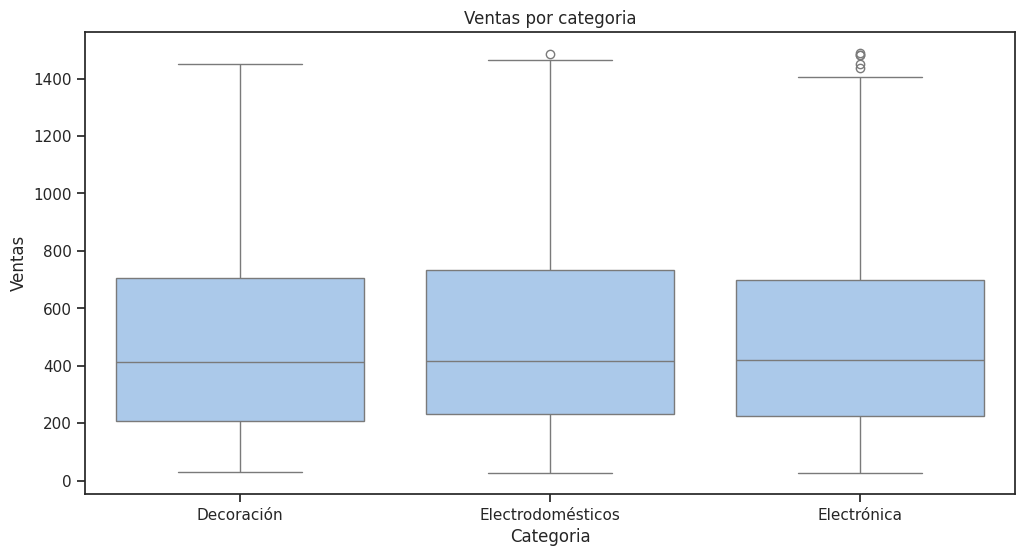

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data= ventas_calc, x="categoria" ,y="total_venta")
ax.set_title('Ventas por categoria')
ax.set_xlabel('Categoria')
ax.set_ylabel('Ventas')
plt.show()


In [ ]:
ventas_calc['DiaDeSemana'] = pd.to_datetime(ventas_calc['fecha_venta']).dt.day_name()
ventas_calc['DiaDeSemana'] = ventas_calc['DiaDeSemana'].str.title()
ventas_x_diaSemana = (ventas_calc
      .groupby(by = 'DiaDeSemana',
                                 dropna= False,
                                 as_index= False)
      .agg(imp_total_ventas = ("total_venta",'sum'),
           cant_unidades_vendidas = ("cantidad", 'sum'),
           cant_de_ventas = ("cantidad", 'count'),
           precio_medio = ("precio", 'mean'),
           mejor_venta = ("total_venta", 'max'),
           peor_venta = ("total_venta", 'min'),
           venta_promedio = ("total_venta", 'mean')
      )
       .sort_index()
       .reset_index()
)

display(ventas_x_diaSemana)

,index,DiaDeSemana,imp_total_ventas,cant_unidades_vendidas,cant_de_ventas,precio_medio,mejor_venta,peor_venta,venta_promedio,imp_total_ventas_acum
0,0,Friday,191466.95,2565,378,74.282143,1458.72,28.91,506.526323,191466.95
1,1,Monday,199054.71,2595,418,76.357799,1452.0,29.17,476.20744,390521.66
2,2,Saturday,215017.9,2900,444,74.836261,1422.6,32.3,484.27455,605539.56
3,3,Sunday,219720.77,2889,447,76.615436,1483.2,31.42,491.545347,825260.33
4,4,Thursday,220610.75,2952,435,75.523149,1485.96,29.76,507.151149,1045871.08
5,5,Tuesday,200745.02,2720,439,73.164897,1488.12,30.59,457.27795,1246616.1
6,6,Wednesday,220477.42,2874,437,76.157437,1461.24,26.3,504.524989,1467093.52


<Axes: xlabel='DiaDeSemana', ylabel='cant_unidades_vendidas'>

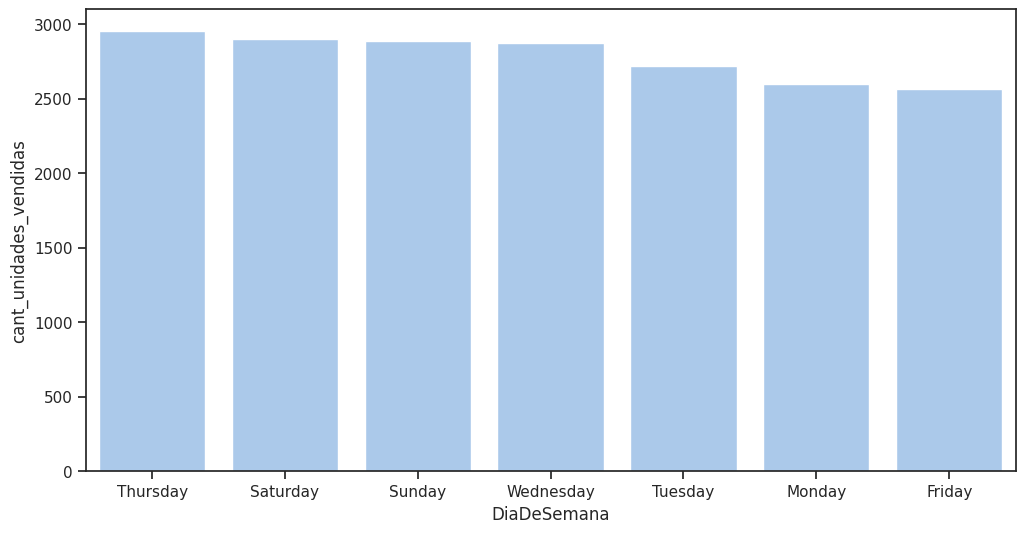

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DiaDeSemana',
            y='cant_unidades_vendidas',
            data=ventas_x_diaSemana,order=ventas_x_diaSemana.sort_values('cant_unidades_vendidas', ascending=False).DiaDeSemana)